<p style="font-family: Arial; font-size:3.5em;font-style:bold"><br>
NETFLIX Data Analysis</p><br>

The aim of this project is to recommend movie based on the given dataset. The dataset is a NETFLIX dataset consisting of around 20 million rows, 4000 movies and 400000 users.



<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Importing Libraries</p>

Importing necessary libraries. Main purpose of using so many libraries is that it reduces the number of lines in code by simply using predefined functions.

In [2]:
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate

ModuleNotFoundError: No module named 'surprise'

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Loading data</p>

In [4]:
#data = pd.read_csv("D:/Danial Khilji/Documents/UCLAN/Programming with Data EL-4013/Course Work 1 (Python)/Netflix data set/combined_data_1.txt",
#                               header = None, names = ['Customer_Id', 'Rating'], usecols = [0,1])
data = pd.read_csv('C:/Users/dania/Documents/Python/NETFLIX Analysis/combined_data_1.txt',
                               header = None, names = ['Customer_Id', 'Rating'], usecols = [0,1])

#used to load portion of data while testing code
#data = data.iloc[500000:900000]

In [5]:
# Converting ratings into float data type
data['Rating'] = data['Rating'].astype(float)

Loading other three files and converting into float.

Note: This part of the code did not worked because it caused the kernel to die constantly.

In [4]:
#data_2 = pd.read_csv('/home/student/Documents/UCLAN/combined_data_2.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#data_3 = pd.read_csv('/home/student/Documents/UCLAN/combined_data_3.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#data_4 = pd.read_csv('/home/student/Documents/UCLAN/combined_data_4.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

#data_2['Rating'] = data_2['Rating'].astype(float)
#data_3['Rating'] = data_3['Rating'].astype(float)
#data_4['Rating'] = data_4['Rating'].astype(float)

#print('Dataset 2 shape: ', data_2.shape)
#print('Dataset 3 shape: ', data_3.shape)
#print('Dataset 4 shape: ', data_4.shape)

Combining all the data files

In [5]:
#data = data.append(data_2)
#data = data.append(data_3)
#data = data.append(data_4)

Loading the movies title file. There were numerous ways to decode the movies title file. Only ISO-8859-1 worked fine, also known as Latin-1. Previosuly I tried loading through engine='python' which works for every file type but it did not worked here.

In [7]:
titles = pd.read_csv('C:/Users/dania/Documents/Python/NETFLIX Analysis/movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
titles.set_index('Movie_Id', inplace = True)
print (titles.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [8]:
titles.shape

(17770, 2)

In [9]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17770 entries, 1 to 17770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    17763 non-null  float64
 1   Name    17770 non-null  object 
dtypes: float64(1), object(1)
memory usage: 416.5+ KB


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Exploring Data</p> 

In [8]:
data.head()

,Customer_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


On the first glance, it can be seen that there are only two columns and some rows contain NaN values.

In [9]:
data.describe()

,Rating
count,2.405376e+07
mean,3.599634e+00
std,1.086118e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [10]:
data.shape

(24058263, 2)

There are approximately 24 million customers!

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Customer_Id  object 
 1   Rating       float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [12]:
data.isna()

,Customer_Id,Rating
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24058258,False,False
24058259,False,False
24058260,False,False
24058261,False,False


 <p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Visualizing Data</p> 

To visualize the data, it was grouped by Rating columns and total number of ratings for each value of rating was calculated. Total number of unique customers were then calculated.

In [13]:
spread = data.groupby('Rating')['Rating'].agg(['count'])
print("Number of movies per each rating: ")
print(spread)
#movie_count variable is used later
movie_count = data.isnull().sum()[1]

# total rating count
rating_count = data['Customer_Id'].count()
print('Total number of ratings: ', rating_count)
# total unique customer count
customer_count = data['Customer_Id'].nunique()
print('Total number of unique customers: ', customer_count)

Number of movies per each rating: 
          count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583
Total number of ratings:  24058263
Total number of unique customers:  475257


Horizontal bar plot was used to visualize percentage of each rating out of total number of ratings. On a scale of 0-5, the general trend is that there is a higher number of movies in the rating 3 or above. Small number of rating for 2 or below is due to the fact that people generally tend to not to rate a movie if it is not entertaining to them. Therefore, if a movie is having a low rating it means that it is considerabally worse. 

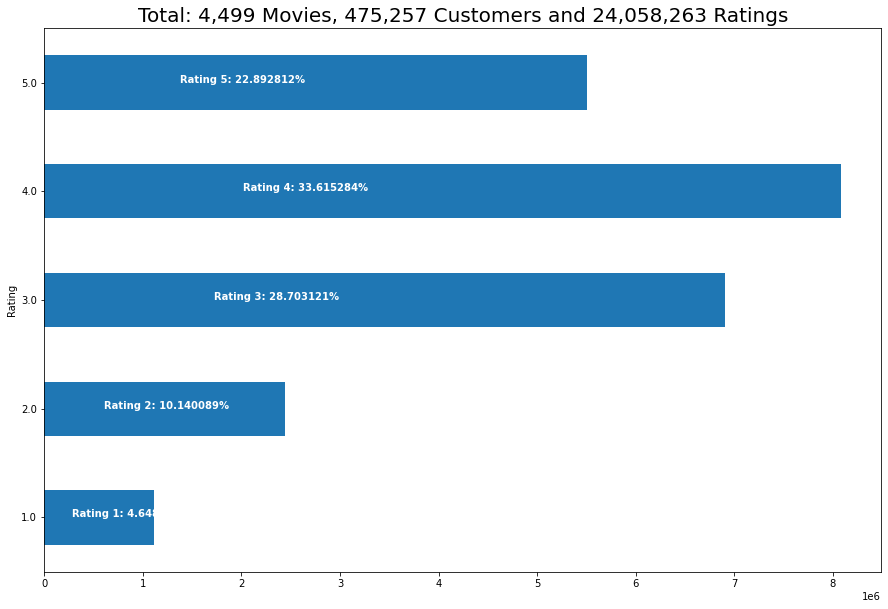

In [14]:
ax = spread.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total: {:,} Movies, {:,} Customers and {:,} Ratings'.format(movie_count, customer_count, rating_count), fontsize = 20)
plt.axis('on')
#for loop to calculate percentages for each bar
for i in range(1,6):
    ax.text(spread.iloc[i-1][0]/4, i-1, 'Rating {}: {:0f}%'.format(i, spread.iloc[i-1][0]*100 / spread.sum()[0]), color = 'white', weight = 'bold')

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Cleaning Data</p> 

In [15]:
# total customer count after removing null values
customer_count_clean = data['Customer_Id'].nunique() - movie_count
print('Total number of unique customer after removing null values: ', customer_count_clean)

# total rating count after removing null values
rating_count_clean = data['Customer_Id'].count() - movie_count
print('Total number of ratings after removing null values: ', rating_count_clean)

Total number of unique customer after removing null values:  470758
Total number of ratings after removing null values:  24053764


To insert movie ID column in the main dataset:

In [16]:
data_null = pd.DataFrame(pd.isnull(data.Rating))
data_null = data_null[data_null['Rating'] == True]
data_indx = data_null.reset_index()

movie_arr = []
movie_id = 1

for i,j in zip(data_indx['index'][1:],data_indx['index'][:-1]):
    tmp = np.full((1,i-j-1), movie_id)
    movie_arr = np.append(movie_arr, tmp)
    movie_id += 1

#for last row
last_row = np.full((1,len(data) - data_indx.iloc[-1, 0] - 1), movie_id)
movie_arr = np.append(movie_arr, last_row)

print('Movie numpy: {}'.format(movie_arr))
print('Length: {}'.format(len(movie_arr)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [17]:
#Removing null values
data = data[pd.notnull(data['Rating'])]
#Changing data types to int for later anaysis
data['Movie_Id'] = movie_arr.astype(int)
data['Customer_Id'] = data['Customer_Id'].astype(int)

In [18]:
#removing NaN values from titles dataset
titles.dropna()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


When the recommendation model below was ran, it took considerabally long time. Therefore, customers which are not actively giving feedback are ignored to improve algorithm.

In [19]:
cnt_mean = ['count', 'mean']
movie_summary = data.groupby('Movie_Id')['Rating'].agg(cnt_mean)
movie_summary.index = movie_summary.index.map(int)
movie_benchmark = round(movie_summary['count'].quantile(0.7),0)
drop_movie_list = movie_summary[movie_summary['count'] < movie_benchmark].index
print('Movies with minimum reviews: ', movie_benchmark)

data_summary = data.groupby('Customer_Id')['Rating'].agg(cnt_mean)
data_summary.index = data_summary.index.map(int)
customer_benchmark = round(data_summary['count'].quantile(0.7),0)
drop_customer_list = data_summary[data_summary['count'] < customer_benchmark].index
print('Customer with minimum reviews: ', customer_benchmark)

Movies with minimum reviews:  1799.0
Customer with minimum reviews:  52.0


Pivoting dataset to organize in order by Rating, Customer ID and Movie ID, in this order.

In [20]:
data_pivot = pd.pivot_table(data, values='Rating', index='Customer_Id', columns='Movie_Id')
print(data_pivot.shape)

(470758, 4499)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Movie recommendation models</p> 

There are two main types of recommender systems namely Collaborative filtering and Content-Based recommendations. In this case, I have used the famous recommender system algorithm called SVD which is famous for its use by Simon Funk in Netflix Prize competition [salakhutdinov2008a]. Although, the algorithm for first built by Nicolas Hug. It is a collaborative filtering type of recommendation system. It uses the past liking of the person to suggest a new movie.

In [21]:
start = time.time()
reader = Reader()
#need to load dataset using Dataset.load_from_df as a SVD surprise library requirement
data_set = Dataset.load_from_df(data[['Customer_Id', 'Movie_Id', 'Rating']][:], reader)
svd = SVD()
cross_validate(svd, data_set,measures=['RMSE', 'MAE'])
print('Execution completed!')
duration = time.time() - start
print('Execution time: ', duration)

Execution completed!
Execution time:  6261.922814846039


Lets check what the model will suggest that users liked the most.

In [22]:
check = data[(data['Customer_Id'] == 785314) & (data['Rating'] == 5)]
check = check.set_index('Movie_Id')
check = check.join(titles)['Name']
print(check)

Movie_Id
57                                            Richard III
175                                        Reservoir Dogs
311                                               Ed Wood
329                                                 Dogma
331                                           Chasing Amy
395                                         Captain Blood
788                                                Clerks
798                                                  Jaws
907                                       Animal Crackers
985                                             The Mummy
1552                                          Black Adder
1905    Pirates of the Caribbean: The Curse of the Bla...
2000                          Four Weddings and a Funeral
2122                                 Being John Malkovich
2342                                        Super Size Me
2360                                  Singin' in the Rain
2430                           Alien: Collector's Edition
2443 

Suggestion to the user based on past feedback

In [24]:
sgtn = titles.copy()
sgtn = sgtn.reset_index()
sgtn = sgtn[~sgtn['Movie_Id'].isin(drop_movie_list)]

data_new = Dataset.load_from_df(data[['Customer_Id', 'Movie_Id', 'Rating']], reader)

training = data_new.build_full_trainset()

sgtn['Estimate_score'] = sgtn['Movie_Id'].apply(lambda x: svd.predict(7885314, x).est)
sgtn = sgtn.drop('Movie_Id', axis = 1)
sgtn = sgtn.sort_values('Estimate_score', ascending = False)
print(sgtn.head(20))

        Year                                Name  Estimate_score
3455  2004.0                      Lost: Season 1        4.673039
4426  2001.0             The West Wing: Season 3        4.583990
2113  2002.0                             Firefly        4.520188
2161  2000.0                       CSI: Season 1        4.509440
4237  2000.0                           Inu-Yasha        4.488223
1475  2004.0            Six Feet Under: Season 4        4.483182
3927  2004.0                  Nip/Tuck: Season 2        4.477603
3957  2003.0                      Monk: Season 2        4.471096
1494  2001.0                     Alias: Season 1        4.427878
773   2003.0                  Foyle's War: Set 2        4.427698
2781  1995.0                          Braveheart        4.423591
2802  1995.0                 Pride and Prejudice        4.420615
1946  2002.0             Gilmore Girls: Season 3        4.420421
3961  2003.0           Finding Nemo (Widescreen)        4.404949
3289  1974.0             

 The next model is Pearsons´ R correlation recommendation model. It is used to measure correlation between review score and pairs of movies. For this method I have made a function so that it can be used anytime with different movie name. Function will first find index of movie from the list then apply correlation.

In [25]:
def pearson_r(movie_name, min_count):
    print('Top 10 recommendations are: ')
    movie_indx = int(titles.index[titles['Name'] == movie_name][0])
    target = data_pivot[movie_indx]
    similar = data_pivot.corrwith(target)
    corr = pd.DataFrame(similar, columns = ['PearsonR'])
    corr.dropna(inplace = True)
    corr = corr.sort_values('PearsonR', ascending = False)
    corr.index = corr.index.map(int)
    corr = corr.join(titles).join(movie_summary)[['PearsonR', 'Name', 'count', 'mean']]
    print(corr[corr['count']>min_count][:10].to_string(index=False))

Now I can simply ask suggestion for any movie by simply asking the function person_r.

In [27]:
movies = ['Lord of the Rings: The Fellowship of the Ring', '2 Fast 2 Furious', 'Batman Begins']
for i in movies:
    print('Movie suggetions based on: ', i)
    pearson_r(i, 0)
    print()

Movie suggetions based on:  Lord of the Rings: The Fellowship of the Ring
Top 10 recommendations are: 
 PearsonR                                           Name   count      mean
 1.000000  Lord of the Rings: The Fellowship of the Ring  149866  4.434708
 0.641471           Thomas & Friends: 10 Years of Thomas      64  3.593750
 0.580950                      Bram Stoker's: To Die For      36  2.000000
 0.545162            Karl Rove: The Architect: Frontline      46  3.478261
 0.487345                     Adventures of Mini-Goddess      98  3.510204
 0.478696                      Voltage Fighter Gowcaizer     108  3.018519
 0.457220                 Jean Renoir: Elena and Her Men     111  2.720721
 0.456583                                     Postmortem      84  2.595238
 0.453819                          Sahib Bibi Aur Ghulam     127  3.314961
 0.449465                      Joe Pass: An Evening With     122  3.655738

Movie suggetions based on:  2 Fast 2 Furious
Top 10 recommendations are

In [28]:
pearson_r('What the #$*! Do We Know!?', 0)

Top 10 recommendations are: 
 PearsonR                                         Name  count      mean
 1.000000                   What the #$*! Do We Know!?  14910  3.189805
 1.000000                                       Paheli     62  3.629032
 0.984338  Motorcycle Mania 3: Jesse James Rides Again     94  3.574468
 0.974315                     Detonator 2: Night Watch    124  2.701613
 0.964184                       Pavement: Slow Century     84  3.630952
 0.959960                                  Bears: IMAX     62  3.435484
 0.940775                        Sahib Bibi Aur Ghulam    127  3.314961
 0.938112              Billy Blanks: Tae Bo: Contact 2    123  2.934959
 0.924426    NBA Street Series: Ankle Breakers: Vol. 2    122  3.278689
 0.918559                Chained Heat 3: Hell Mountain    108  2.222222


In [1]:
print('danial')

danial
